---
title: "Investigation of Standard Scaling Influence"
author: "Sherry Thomas"
format:
  html:
    theme: theme.scss
    toc: true
    html-math-method: katex
---

Colab Link: [Click here!](https://colab.research.google.com/drive/14aGKUz7A_1SKdaHwYGMlWOKQw31jFh_2?usp=sharing){target="_blank"}

This Jupyter Notebook is dedicated to an in-depth investigation of feature scaling's significance, specifically focusing on standard scaling, also known as Z-score normalization. Feature scaling is an indispensable preprocessing step in numerous machine learning algorithms. It often enhances model performance. This study is vital as it sheds light on the practical implications of feature scaling in real-world applications. The wine dataset from the UCI Machine Learning Repository will be employed to demonstrate the effects of feature scaling.

## Overview

Feature scaling is a vital preprocessing step in various machine learning algorithms, and one of the most used ones is the Standard Scaler. It involves rescaling each feature in the dataset to have a standard deviation of 1 and a mean of 0. This normalization is necessary for several reasons, although tree-based models are less affected by feature scaling. Other algorithms might require feature normalization for different purposes, such as improving convergence or creating different model fits.

## The Wine Dataset

The wine dataset from UCI will be used in this study. This dataset contains continuous features that measure different properties, such as alcohol content, malic acid, amongst others. These features are heterogeneous in scale, making it an excellent example to illustrate the effects of standard scaling.

### Data Loading and Preparation

We will start by loading and preparing the wine dataset for our analysis. We will also split the data into training and testing sets. This is a common practice in machine learning to evaluate the performance of a model on unseen data.

In [1]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load the wine dataset
X, y = load_wine(return_X_y=True, as_frame=True)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Standardize the features
scaler = StandardScaler()
scaler.set_output(transform="pandas")
scaled_X_train = scaler.fit_transform(X_train)

## Analysis of Standard Scaling Effects

### Visualizing the Effect on a K-Neighbors Model

To visually demonstrate the effect of standard scaling on a K-Neighbors Classifier, we select a subset of two features, "proline" and "hue," which have values with different orders of magnitude. We will visualize the decision boundary of the classifier with and without scaling. The K-Neighbors Classifier is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point.

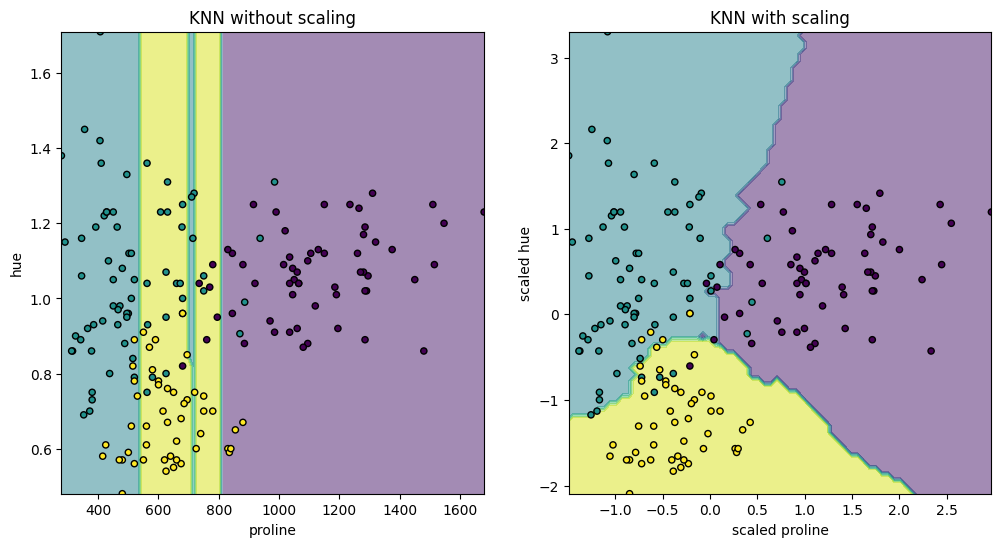

In [2]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay

# Define the features for visualization
X_plot = X[["proline", "hue"]]
X_plot_scaled = scaler.fit_transform(X_plot)

# Create K-Neighbors Classifier
clf = KNeighborsClassifier(n_neighbors=20)

# Define a function to fit and plot the model
def fit_and_plot_model(X_plot, y, clf, ax):
    clf.fit(X_plot, y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf, X_plot, response_method="predict", alpha=0.5, ax=ax
    )
    disp.ax_.scatter(X_plot["proline"], X_plot["hue"], c=y, s=20, edgecolor="k")
    disp.ax_.set_xlim((X_plot["proline"].min(), X_plot["proline"].max()))
    disp.ax_.set_ylim((X_plot["hue"].min(), X_plot["hue"].max()))
    return disp.ax_

# Plot the decision boundaries
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
fit_and_plot_model(X_plot, y, clf, ax1)
ax1.set_title("KNN without scaling")
fit_and_plot_model(X_plot_scaled, y, clf, ax2)
ax2.set_xlabel("scaled proline")
ax2.set_ylabel("scaled hue")
_ = ax2.set_title("KNN with scaling")

The visualizations depict a significant change in the decision boundary when we scale the features. Without scaling, the variable "proline" dominates the decision boundary due to its higher magnitude, while "hue" is comparatively ignored. After scaling, both variables have similar impacts on the decision boundary.

### Impact of Standard Scaling on PCA

Next, we will examine the effect of standard scaling on Principal Component Analysis (PCA). PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance. Scaling is crucial as it ensures that features with different scales do not dominate the principal components.

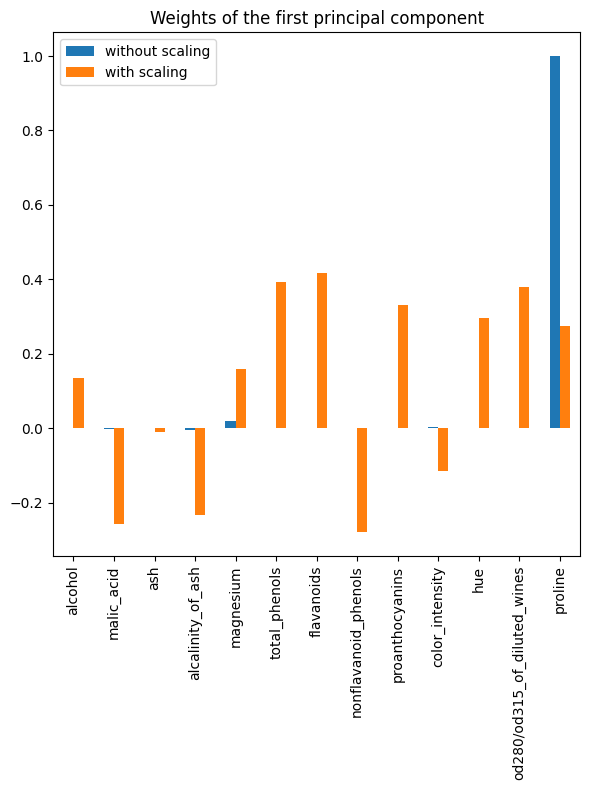

In [3]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2).fit(X_train)
scaled_pca = PCA(n_components=2).fit(scaled_X_train)
X_train_transformed = pca.transform(X_train)
X_train_std_transformed = scaled_pca.transform(scaled_X_train)

# Visualize the weights of the first principal component
first_pca_component = pd.DataFrame(
    pca.components_[0], index=X.columns, columns=["without scaling"]
)
first_pca_component["with scaling"] = scaled_pca.components_[0]
first_pca_component.plot.bar(
    title="Weights of the first principal component", figsize=(6, 8)
)
_ = plt.tight_layout()

As observed, the “proline” feature dominates the direction of the first principal component without scaling, being about two orders of magnitude above the other features. This is contrasted when observing the first principal component for the scaled version of the data, where the orders of magnitude are roughly the same across all the features.

We can visualize the distribution of the principal components in both cases:

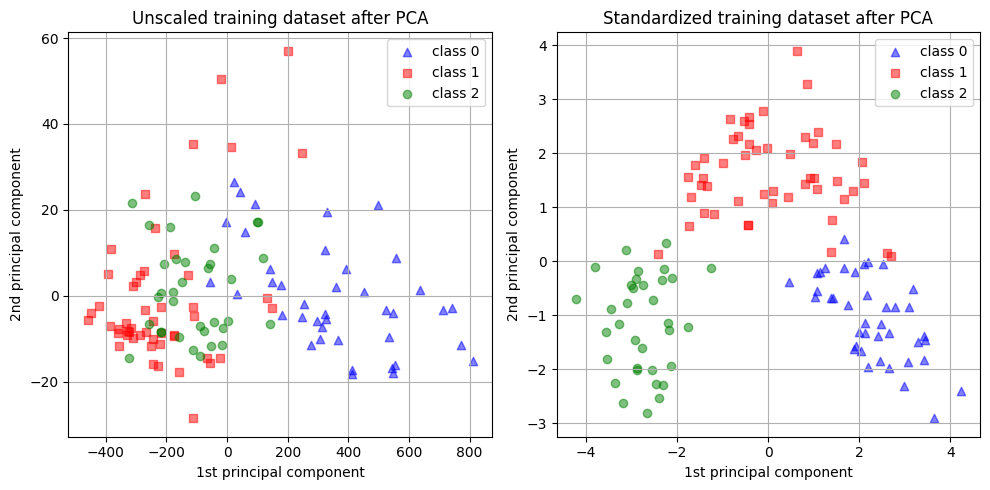

In [4]:
# Visualize the distribution of principal components
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
target_classes = range(0, 3)
colors = ("blue", "red", "green")
markers = ("^", "s", "o")
for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=X_train_transformed[y_train == target_class, 0],
        y=X_train_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )
    ax2.scatter(
        x=X_train_std_transformed[y_train == target_class, 0],
        y=X_train_std_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )
ax1.set_title("Unscaled training dataset after PCA")
ax2.set_title("Standardized training dataset after PCA")
for ax in (ax1, ax2):
    ax.set_xlabel("1st principal component")
    ax.set_ylabel("2nd principal component")
    ax.legend(loc="upper right")
    ax.grid()
_ = plt.tight_layout()

In the above visualizations, we can see the impact of scaling on PCA. Without scaling, one feature dominates the first principal component, while scaling results in components with similar orders of magnitude across all features.

## Conclusion

This Jupyter Notebook has explored the effects of standard scaling on machine learning models using the wine dataset. We observed how standard scaling influences decision boundaries and the behavior of PCA. Scaling the features ensures that no single feature dominates the analysis and can lead to improved model performance. It is an important preprocessing step to consider when working with machine learning algorithms. Future research could focus on the effects of other scaling methods and their impact on different types of machine learning models.

## References

This notebook is based on the sklearn document titled "Importance of Feature Scaling". You can find more information at the following link: [Importance of Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).